# **Importing**

In [1]:
#
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Reading Dataset**

In [2]:
train_data_filepath = '/kaggle/input/titanic/train.csv'
test_data_filepath = '/kaggle/input/titanic/test.csv'

train_data = pd.read_csv(train_data_filepath)
test_data = pd.read_csv(test_data_filepath)

# **Data Inspection**

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
age = train_data['Age']
train_data['Age'] = age.fillna(age.mean()) 
age = test_data['Age']
test_data['Age'] = age.fillna(age.mean()) 

cabin = train_data['Cabin']
train_data['Cabin'] = cabin.fillna(cabin.mode()[0])  
cabin = test_data['Cabin']
test_data['Cabin'] = cabin.fillna(cabin.mode()[0])  

embarked = train_data['Embarked']
train_data['Embarked']= embarked.fillna(embarked.mode()[0])
embarked = test_data['Embarked']
test_data['Embarked']= embarked.fillna(embarked.mode()[0])

sex = test_data['Sex']
test_data['Sex']= sex.fillna(sex.mode()[0])

fare = test_data['Fare']
test_data['Fare']= fare.fillna(fare.mode()[0])

In [8]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
train_data.duplicated().sum()
train_data.drop_duplicates()
test_data.duplicated().sum()
test_data.drop_duplicates()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


# **Univariant Analysis**

In [11]:
train_data['Pclass'] = train_data['Pclass'].astype('object')
test_data['Pclass'] = test_data['Pclass'].astype('object')
test_data= test_data.set_index('PassengerId')
train_data= train_data.set_index('PassengerId')
features_to_drop = ['Name', 'Cabin', 'Ticket']
train_data= train_data.drop(columns=features_to_drop)

features = train_data.drop(columns=['Survived']).columns
target = 'Survived'

numerical_cols = train_data[features].select_dtypes(exclude=['object']).columns.tolist()
categorical_cols = train_data[features].select_dtypes(include=['object']).columns.tolist()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

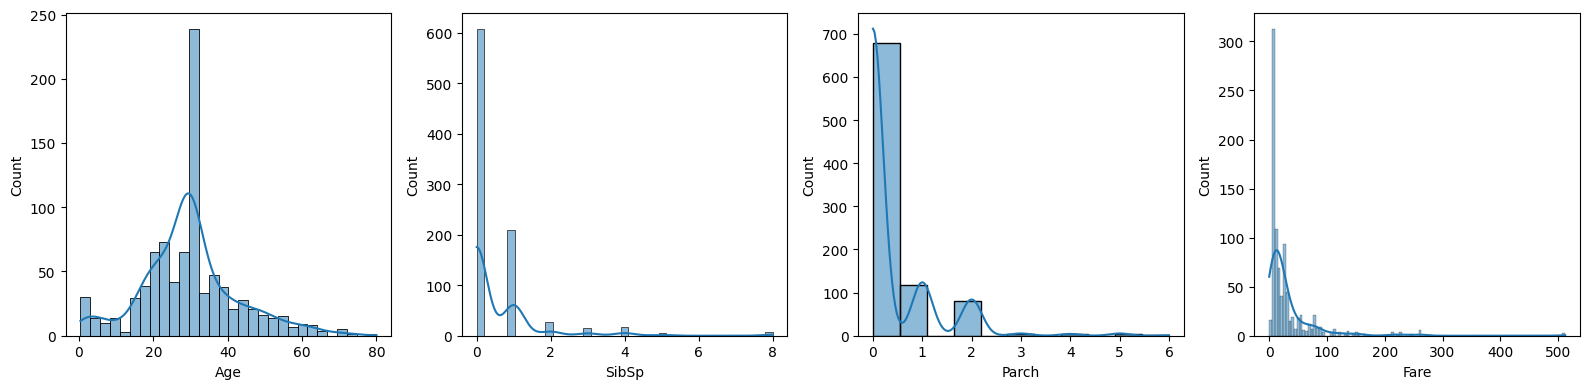

In [12]:
plt.figure(figsize=(16, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.histplot(train_data[col], kde=True)
    
plt.tight_layout()

# **Encoding**

In [13]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# **Model Comparison**

In [14]:
X= train_data.drop(columns=['Survived'])
Y= train_data['Survived']

In [15]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size= 0.2, random_state=43, stratify= Y)

In [16]:
models= {
    "Logistic Regression": LogisticRegression(max_iter= 200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state= 43),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators= 100, random_state= 43),
    "SVC": SVC(),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state= 43),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state= 43),
    "Naive Bayes": GaussianNB()
}

In [17]:
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred= model.predict(X_valid)
    accuracy= accuracy_score(Y_valid,y_pred)
    accuracy_results[name]= accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")

Logistic Regression: Accuracy = 0.8212
Random Forest: Accuracy = 0.8045
Gradient Boosting: Accuracy = 0.8268
SVC: Accuracy = 0.7318
Hist Gradient Boosting: Accuracy = 0.8156
KNN: Accuracy = 0.7318
Decision Tree: Accuracy = 0.7821
Naive Bayes: Accuracy = 0.8268


# **Prediction**

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [19]:
y_valid_pred = nb_model.predict(X_valid)
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_test_pred = nb_model.predict(X_test)

# **Evaluation Confusion Matrix**

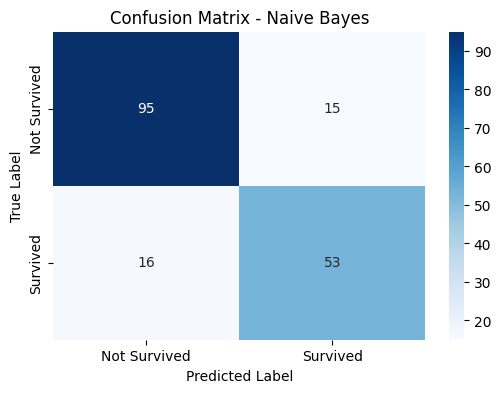

In [20]:

cm = confusion_matrix(Y_valid, y_valid_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [21]:
accuracy = accuracy_score(Y_valid, y_valid_pred)
print(f"Naive Bayes Validation Accuracy: {accuracy:.4f}")

Naive Bayes Validation Accuracy: 0.8268
